In [63]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [25]:
df = pd.read_csv("OHLC_values.csv")

In [31]:
df = df.loc[df['ID'] == 'HBL']

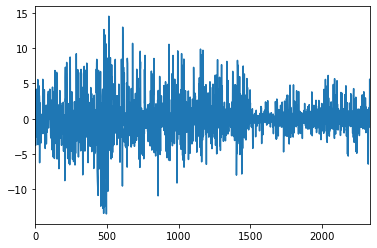

In [43]:
df['Change'].plot()

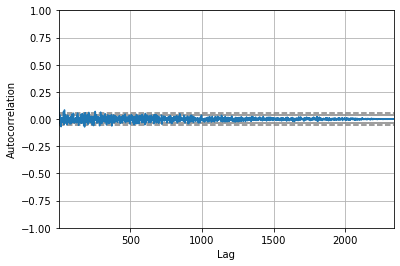

In [47]:
autocorrelation_plot(df['Change'])

In [60]:
# fit model
model = ARIMA(df['Change'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Change   No. Observations:                 2337
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5898.973
Method:                       css-mle   S.D. of innovations              3.019
Date:                Tue, 01 Oct 2019   AIC                          11811.946
Time:                        22:42:42   BIC                          11852.243
Sample:                             1   HQIC                         11826.626
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.021      0.044      0.965      -0.040       0.042
ar.L1.D.Change    -0.6305      0.020    -30.990      0.000      -0.670      -0.591
ar.L2.D.Change    -0.4976      0.023

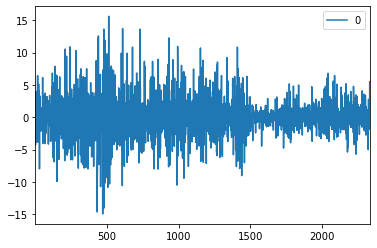

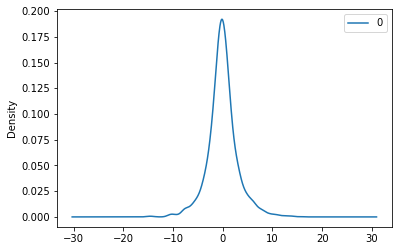

                 0
count  2337.000000
mean      0.000372
std       3.020485
min     -14.972422
25%      -1.425536
50%      -0.090699
75%       1.334094
max      15.633971


In [62]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=0.012560, expected=-0.740000
predicted=-0.693955, expected=-0.710000
predicted=-0.423297, expected=-0.010000
predicted=-0.146712, expected=-0.230000
predicted=-0.283129, expected=-0.680000
predicted=-0.242743, expected=0.290000
predicted=-0.205616, expected=-1.040000
predicted=-0.571140, expected=0.450000
predicted=-0.046783, expected=0.000000
predicted=-0.104205, expected=-0.460000
predicted=-0.353116, expected=-0.340000
predicted=-0.196988, expected=-0.210000
predicted=-0.299380, expected=0.310000
predicted=0.090583, expected=-0.060000
predicted=-0.088337, expected=-0.220000
predicted=-0.210155, expected=-0.230000
predicted=-0.167926, expected=0.100000
predicted=-0.020125, expected=-0.100000
predicted=-0.020254, expected=-0.510000
predicted=-0.261846, expected=0.450000
predicted=0.046315, expected=-0.660000
predicted=-0.277112, expected=0.380000
predicted=0.043066, expected=-1.730000
predicted=-0.686453, expected=0.290000
predicted=-0.206027, expected=0.630000
predicted=0.1

predicted=0.893547, expected=-0.330000
predicted=0.357997, expected=-1.450000
predicted=-0.491868, expected=-0.350000
predicted=0.086384, expected=-2.510000
predicted=-0.496232, expected=3.360000
predicted=1.241291, expected=2.670000
predicted=0.989925, expected=1.440000
predicted=0.586607, expected=-0.250000
predicted=0.379620, expected=-0.410000
predicted=0.152250, expected=1.260000
predicted=1.471660, expected=0.310000
predicted=0.854145, expected=-2.210000
predicted=-0.515775, expected=1.160000
predicted=0.245630, expected=-1.050000
predicted=-0.340824, expected=1.020000
predicted=0.353424, expected=-2.740000
predicted=-1.047602, expected=-0.110000
predicted=-0.709445, expected=-0.720000
predicted=-0.301794, expected=-3.600000
predicted=-1.881693, expected=3.330000
predicted=0.617507, expected=2.820000
predicted=0.614961, expected=-1.370000
predicted=-0.393964, expected=1.510000
predicted=0.514204, expected=1.800000
predicted=0.803694, expected=4.770000
predicted=2.926021, expected

predicted=-0.168041, expected=-1.000000
predicted=-0.014409, expected=-0.450000
predicted=-0.266668, expected=0.470000
predicted=-0.000607, expected=-0.680000
predicted=-0.242864, expected=1.200000
predicted=-0.105728, expected=-0.900000
predicted=-0.415696, expected=-0.540000
predicted=-0.326030, expected=-0.730000
predicted=-0.274468, expected=-0.760000
predicted=-0.526665, expected=-1.290000
predicted=-0.597517, expected=0.800000
predicted=-0.236200, expected=-0.650000
predicted=-0.518339, expected=-0.990000
predicted=-0.753776, expected=1.510000
predicted=0.204177, expected=0.690000
predicted=0.152631, expected=2.590000
predicted=1.161455, expected=-0.650000
predicted=0.106621, expected=-0.490000
predicted=0.023472, expected=0.770000
predicted=0.819425, expected=-2.160000
predicted=-0.430073, expected=-1.220000
predicted=-0.342183, expected=0.020000
predicted=-0.420387, expected=0.070000
predicted=-0.332777, expected=0.310000
predicted=-0.110562, expected=0.320000
predicted=-0.3477

predicted=-1.106221, expected=-0.670000
predicted=-0.608740, expected=1.220000
predicted=0.080696, expected=-0.120000
predicted=-0.793698, expected=2.270000
predicted=0.378917, expected=-5.030000
predicted=-1.899398, expected=0.240000
predicted=-0.353572, expected=-0.090000
predicted=-0.015924, expected=-0.380000
predicted=-0.473666, expected=-1.140000
predicted=-0.595904, expected=-5.310000
predicted=-3.052409, expected=0.420000
predicted=-0.656682, expected=-0.550000
predicted=-0.841869, expected=0.570000
predicted=-0.614217, expected=1.090000
predicted=-0.314685, expected=0.950000
predicted=-0.409890, expected=-0.620000
predicted=0.075593, expected=-0.570000
predicted=-0.115407, expected=-0.610000
predicted=-0.031393, expected=-0.540000
predicted=-0.105761, expected=2.220000
predicted=0.737735, expected=1.030000
predicted=0.382622, expected=-0.750000
predicted=-0.164072, expected=-1.040000
predicted=-0.306579, expected=0.240000
predicted=0.148557, expected=0.970000
predicted=0.72133

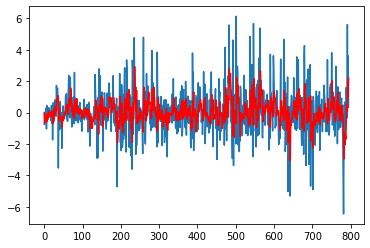

In [68]:
X = df['Change'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()